MAil Spam And Ham Classification

In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#IMPORT DATASET

In [534]:
spam_df = pd.read_csv("/content/emails.csv")



In [535]:
spam_df


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [536]:
spam_df.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [537]:
spam_df.tail(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5162,Email 5163,2,3,1,2,1,2,32,0,0,...,0,0,0,0,0,0,0,0,0,1
5163,Email 5164,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5164,Email 5165,21,18,3,1,6,4,106,1,2,...,0,0,0,0,0,0,0,0,0,0
5165,Email 5166,1,0,1,0,3,1,12,1,0,...,0,0,0,1,0,0,0,0,0,0
5166,Email 5167,1,0,1,1,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [538]:
spam_df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [539]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


#Visualize dataset

In [540]:
ham = spam_df[ spam_df['spam'] == 0]

In [541]:
ham

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [542]:
spam = spam_df[spam_df['spam'] == 1 ]

In [543]:
spam

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
149,Email 150,5,11,1,2,2,5,49,11,2,...,0,0,0,0,0,0,0,0,0,1
391,Email 392,8,14,3,7,4,6,291,6,0,...,0,0,0,0,0,0,0,114,0,1
528,Email 529,2,4,2,0,1,1,23,2,0,...,0,0,0,0,0,0,0,2,0,1
706,Email 707,1,6,2,0,1,0,41,1,0,...,0,0,0,0,0,0,0,0,0,1
708,Email 709,1,3,2,0,1,1,37,1,0,...,0,0,0,0,0,0,0,0,0,1
746,Email 747,10,15,6,12,7,4,140,7,1,...,0,0,0,2,0,0,0,1,0,1
809,Email 810,10,17,6,6,14,4,120,4,3,...,0,0,0,0,0,0,0,2,0,1
1084,Email 1085,11,14,7,6,11,4,141,7,2,...,0,0,0,0,0,0,0,2,0,1
1189,Email 1190,24,24,4,11,11,23,222,17,6,...,0,0,0,0,0,0,0,1,0,1
1294,Email 1295,8,8,5,4,4,3,219,8,1,...,0,0,0,0,0,0,0,4,0,1


In [544]:
print(" Spam percentage =", (len(spam)/len(spam_df))*100,'%')

 Spam percentage = 1.1020881670533642 %


# imbalance

In [545]:

spam_df.columns


Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [546]:
spam_df['Prediction'].value_counts()

,count
Prediction,
0,3672
1,1500


In [547]:

spam = spam_df[spam_df['Prediction'] == 1] # this is the ROws
spam_percentage = (len(spam)/len(spam_df)) * 100
print("Your spam percentage =", spam_percentage, "%")


Your spam percentage = 29.00232018561485 %


In [548]:
#ham percentage
ham = spam_df[spam_df['Prediction'] == 0 ] # this is column
ham_percentage = (len(ham)/len(spam_df)) * 100
print("Your Ham percentage =", ham_percentage, "%")

Your Ham percentage = 70.99767981438515 %


#Spam and Ham pervcentage View

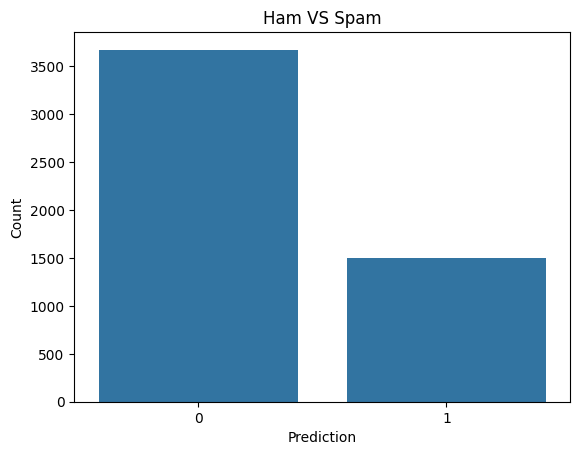

In [549]:
# sns.seaborn(spam_df['spam'])
sns.countplot(x='Prediction', data =  spam_df)
plt.xticks([0,1]), ['Ham', 'Spam']
plt.title("Ham VS Spam")
plt.ylabel("Count")
plt.show()



##Count vecrorize

In [550]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['this is the first document ', " this is the second document ", "this is the third document "]
sample_vectorizer = CountVectorizer()

In [551]:
X = sample_vectorizer.fit_transform(sample_data)


In [552]:
print(sample_vectorizer.get_feature_names_out())

['document' 'first' 'is' 'second' 'the' 'third' 'this']


In [553]:
print(X.toarray())

[[1 1 1 0 1 0 1]
 [1 0 1 1 1 0 1]
 [1 0 1 0 1 1 1]]


COUNT VECTORIZATION

In [554]:
# view Text colum
spam_df.columns


Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [555]:
from sklearn.feature_extraction.text import CountVectorizer

This is just for see my emil text but i already download a vectorize CSV file thats why my email have no text

In [556]:
# word_cols = spam_df.columns[1:-1]  ## exclude 'Email No.' and 'Prediction'

# spam_df['full_text'] = spam_df[word_cols].astype(str).agg(' '.join, axis=1)

# # See first few rows
# print(spam_df[['Email No.', 'full_text', 'Prediction']].head())

TRAIN THE MODEL

In [557]:
label = spam_df['spam'].values

In [558]:
label

array([0, 0, 0, ..., 0, 0, 0])

In [559]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [560]:
X = spam_df.iloc[:, 1:-1]      # all word columns
y = spam_df['Prediction'].values

In [561]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [562]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [563]:
y_pred = NB_classifier.predict(X_test)
print("Accuracy =", accuracy_score(y_test, y_pred))
print("Confusion Matrix and YN", confusion_matrix(y_test, y_pred))


Accuracy = 0.9545893719806763
Confusion Matrix and YN [[704  35]
 [ 12 284]]


In [564]:
from sklearn.metrics import accuracy_score
print(" my Model Accuracy:", accuracy_score(y_test, y_pred))

 my Model Accuracy: 0.9545893719806763


EVALUATING THE MODEL

In [565]:
from sklearn.metrics import classification_report, confusion_matrix

In [566]:
Y_predict_train = NB_classifier.predict(X_train)

In [567]:
Y_predict_train

array([1, 0, 1, ..., 0, 1, 1])

<Axes: >

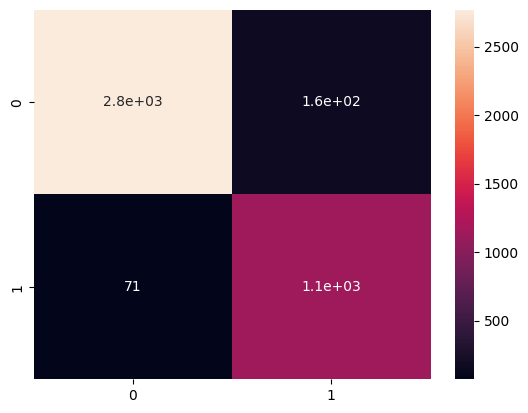

In [568]:
cm = confusion_matrix(y_train, Y_predict_train)
sns.heatmap(cm, annot= True)


THis the best for COINFUSION metrics

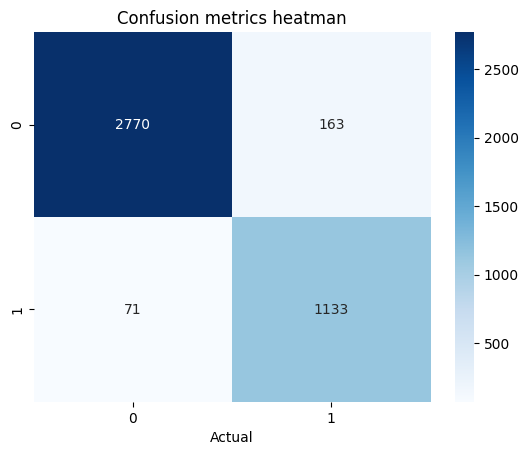

In [570]:
cm = confusion_matrix(y_train, Y_predict_train)
sns.heatmap(cm, annot= True, fmt = "d", cmap = "Blues")
plt.xlabel('Prediction')
plt.xlabel('Actual')
plt.title("Confusion metrics heatman")
plt.show()

<Axes: >

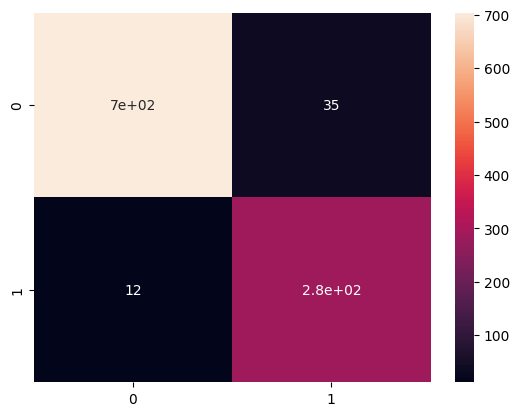

In [571]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot= True)

In [572]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       739
           1       0.89      0.96      0.92       296

    accuracy                           0.95      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.95      0.96      1035

